In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
import numpy as np
from utils_.visualization import *
from utils_.helper import *
from utils_.tw import *
from tqdm import tqdm
from math import inf, sqrt
from utils_.state_lattice import *
from state_lattice_planner import *
%matplotlib notebook
%load_ext autoreload
%autoreload 2
%load_ext snakeviz 

/home/yu/Documents/courses/KKH598/proj
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The snakeviz extension is already loaded. To reload it, use:
  %reload_ext snakeviz


# setup

In [5]:
cfg = Config("params/tw.yaml")
sys = TWSys(cfg.value, seed = 0)
sl = StateLattice(sys)
path = "logs/sl.npy"
logs = sl.load(path)
world_fn = "Model/worlds/world_short_turn.xml"
dt = 1 / 50
slp = StateLatticePlanner(sl, world_fn, dt)

load config...
{'space_sets': {'d': 0.8,
                'idx': [0, 1, 2],
                'res': 0.5,
                'state_max': [inf, inf, 3.1415927],
                'state_min': [-inf, -inf, -3.1415927],
                'u_max': [2, 2],
                'u_min': [0, 0]},
 'system': {'ctrl_dim': 2, 'dt': 0.02, 'name': 'tw', 'obs_dim': 3},
 'trajOpt': {'N': 20,
             'Q': [[1, 0, 0], [0, 1, 0], [0, 0, 1]],
             'Q_R': [[1, 0, 0], [0, 1, 0], [0, 0, 0.1]],
             'R': [[0.1, 0], [0, 0.1]],
             'h': 0.1}}
Init wheelchair Model
Load state lattice
w world trans: ([1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0], [-1.0, -0.0, -0.0])
r world trans: ([1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0], [-0.0, -0.0, -0.0])
cache init configs: ([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.6106489331783145, -2.3452527184137923, -1.626437623626433, 4.539813847141679, -1.9492054343371301, -3.8653378451487974, 0.0, 0.0, 0.0, 0.6106489331783145, -0.7963399351760008, 1.62643762362643

In [6]:
tgt = [0, -10, 0, 0]
%snakeviz nodes, states_w, states_r, action_taken = slp.plan(tgt, 0.5, 0.5)

start plan
len open set: 10001, min_ind: (6, -14, 1, 1)
retrive trajectory
nodes count: 21
 
*** Profile stats marshalled to file '/tmp/tmped2t_vep'. 
Embedding SnakeViz in this document...


In [7]:
# slp.traj.keys()

<IPython.core.display.Javascript object>


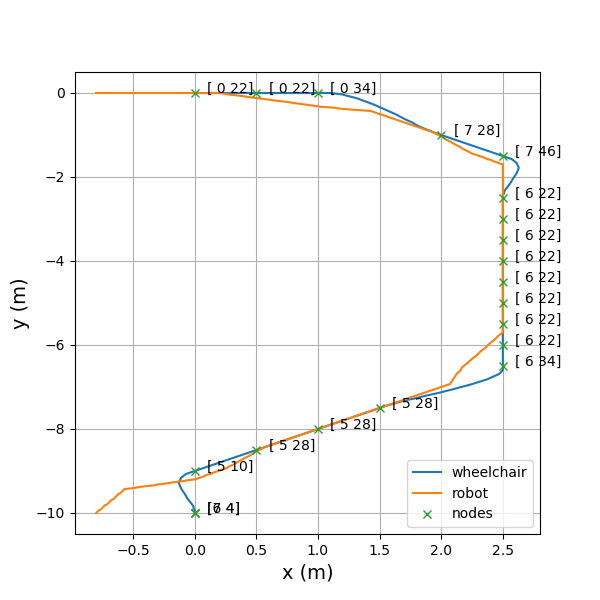

No handles with labels found to put in legend.
/usr/lib/python3/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


In [8]:
axs = plotCfg1(size = [6,6], sub = 1,  title = '', labels = ['y (m)', 'x (m)'])
axs.plot(states_w[:,0], states_w[:,1], linestyle = '-', marker = '', label = "wheelchair")
axs.plot(states_r[:,0], states_r[:,1], linestyle = '-', marker = '', label = "robot")
axs.plot(nodes[:,0], nodes[:,1], linestyle = '', marker = 'x', label = "nodes")
for i in range(nodes.shape[0]-1):
    axs.text(nodes[i,0]+0.1, nodes[i,1], action_taken[i,:])#bbox=dict(fill=False, edgecolor='red', linewidth=2)
# axs.set_xlim(-0.1, 0.1)
# axs.set_ylim(-0.1, 0.1)
axs.legend()

In [10]:
action_taken

array([[ 0, 22],
       [ 0, 22],
       [ 0, 34],
       [ 7, 28],
       [ 7, 46],
       [ 6, 22],
       [ 6, 22],
       [ 6, 22],
       [ 6, 22],
       [ 6, 22],
       [ 6, 22],
       [ 6, 22],
       [ 6, 22],
       [ 6, 34],
       [ 5, 28],
       [ 5, 28],
       [ 5, 28],
       [ 5, 10],
       [ 6,  4],
       [ 7,  4]])

In [9]:
# states_r